# Определение выгодного тарифа для телеком компании

### Постановка задачи
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.




### Общая информация о данных

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# прочитаем файлы:

df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [2]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [3]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


#### В исходных файлах представленны нескелько таблиц, описывающих данные пользователей и тарифные планы, которые они используют, а также данные о звонках, сообщениях и интернет-трафике. Данные неоднородны по размеру. В некоторых таблицах есть пропуски, а так же типы данных в некоторых колонках неверны. Проведем предподготовку данных.

# Предобработка данных

#### Проверка на отрицательные значения
###### Проверим на отрицательные значения все числовые данные из всех таблиц. Отрицательных быть не должно.

In [11]:
# список с таблицами где есть числовые значения
list_tables = [df_tariffs, df_users, df_calls, df_messages, df_internet]

# список с названиями тех же таблиц (нужно для вывода)
list_nametables = ['df_tariffs', 'df_users', 'df_calls', 'df_messages', 'df_internet']

# применим цикл перебирающий таблицы из первого списка, двигаемся по индексам списка
for i in range(0, len(list_tables)):
    print('-----------------------------')
    print('|{: <27}|'.format(list_nametables[i]))# печатаем название таблицы в которой идет проверка
    print('-----------------------------')
    
    # применим цикл перебирающий названия колонок в индексе метода dtype текущей таблицы
    for column_name in list_tables[i].dtypes.index:
        
        # если тип данных для колонки соответсвует int или float, то применим к ним проверку на отрицательные значения
        if list_tables[i][column_name].dtypes=='int64' or list_tables[i][column_name].dtypes=='float64':
            if list_tables[i][list_tables[i][column_name] < 0][column_name].count() > 0:
                print('|{: <22}|{: >4}|'.format(column_name, 'Есть'))
            else:
                print('|{: <22}|{: >4}|'.format(column_name, 'Нет'))
    print('-----------------------------')
    print()

-----------------------------
|df_tariffs                 |
-----------------------------
|messages_included     | Нет|
|mb_per_month_included | Нет|
|minutes_included      | Нет|
|rub_monthly_fee       | Нет|
|rub_per_gb            | Нет|
|rub_per_message       | Нет|
|rub_per_minute        | Нет|
-----------------------------

-----------------------------
|df_users                   |
-----------------------------
|user_id               | Нет|
|age                   | Нет|
-----------------------------

-----------------------------
|df_calls                   |
-----------------------------
|duration              | Нет|
|user_id               | Нет|
-----------------------------

-----------------------------
|df_messages                |
-----------------------------
|user_id               | Нет|
-----------------------------

-----------------------------
|df_internet                |
-----------------------------
|Unnamed: 0            | Нет|
|mb_used               | Нет|
|user_

### Проверка на дубликаты

In [12]:
# воспользуемся списком таблиц из предыдущего цикла, двигаемся по индексам списка
for i in range(0, len(list_tables)):
    if list_tables[i].duplicated().sum() == 0:
        print('|{: <12}|{: >15}|'.format(list_nametables[i], 'дубликатов нет'))
    elif list_tables[i].duplicated().sum() != 0:
        print('|{: <12}|{: >15}|'.format(list_nametables[i], 'есть дубликаты'))

|df_tariffs  | дубликатов нет|
|df_users    | дубликатов нет|
|df_calls    | дубликатов нет|
|df_messages | дубликатов нет|
|df_internet | дубликатов нет|


### Приведение данных к нужным типам
##### Рассмотрим каждую таблицу, приведем данные к нужным типам и обработаем пропуски где возможно.

df_tariffs:
Все в порядке

df_users:
Нужно привести колонки с датами к типу datetime. Т.к. в колонке churn_date очень много пропусков из-за того, что клиенты до сих пор пользуются тарифом, то привести ее к нужному типу не получится не избавившись от пропусков. Нам эта колонка в анализе не нужна, поэтому оставим и пропуски и тип данных как есть.

In [13]:
# применим метод pd.to_datetime чтобы привести временные данные в надлежащий вид

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


df_calls:
Колонку с датами приведем к типу datetime.

In [14]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


df_messages:
Колонку с датами приведем к типу datetime.

In [15]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


df_internet:
Колонку с датами приведем к нужному типу.

In [16]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


### Исправление ошибок
В таблице df_internet есть столбец "Unnamed: 0", который повторяет индексы строк. Его можно удалить.

In [17]:
del df_internet['Unnamed: 0']
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


В датафрейме df_calls колонка с продолжительностью звонков содержит много нулевых значений.

In [18]:
df_calls[df_calls['duration']==0]['duration'].count()

39613


##### Это довольно большой объем данных чтобы просто удалить его.

##### Нулевые значения могут быть либо ошибками в данных, либо звонивший не смог дозвониться. Т.к. все остальные данные предоставленны почти без ошибок, то я склонен считать, что здесь тоже ошибки маловероятны, т.е. звонивший не смог дозвониться.

##### Задача - узнать какой тариф лучше. Поэтому я считаю, что для отдела коммерции более значимы данные с ненулевыми значениями, ведь тогда можно проводить различные оценки, считать суммы и прочее. А данные с нулевыми значениями более подходят для, например, технического отдела. Ведь ноль может быть звоночком, что с сетью что то не так и пользователи не могут совершить звонки.

##### Трудно принять какое-либо аргументированное решение плохо представляя предметную область и не имея возможности проконсультироваться с заказчиком.

##### Поэтому, т.к. в следющем разделе нам нужно будет посчитать количество звонков, я пока не буду удалять нулевые данные из таблицы. Возможно, это придется сделать при статистическом анализе, но там и посмотрим.

## Вычисление параметров для каждого пользователя

#### Нам нужно посчитать для каждого пользователя следующие величины:

###### количество сделанных звонков и израсходованных минут разговора по месяцам;
###### количество отправленных сообщений по месяцам;
###### объем израсходованного интернет-трафика по месяцам;
###### помесячную выручку с каждого пользователя.
###### Начнем с того, что добавим к каждой таблице колонку month, в которой будет отображен месяц совершения действия, чтобы потом можно было группировать по месяцам.

In [19]:
# определим переменную как список, в которм будет хранится название таблицы и колонки в ней, содержащей дату совершения действия
date_list = []

# нам нужны только три столбца со звонками, сообщениями и трафиком
# поэтому начинаем двигаться со второго индекса в списке таблиц
for i in range(2, len(list_tables)):
    
    # в списке колонок таблицы будем искать ту, у которой название заканчивается на 'date'
    # методом включения определенных символов в срез строки
    for j in range(0, len(list_tables[i].columns)):
        if 'date' in list_tables[i].columns[j][-4:]:
            date_list.append(list_tables[i].columns[j])
            
    # с помощью метода dt.month добавляем месяц в новую колонку 'month'
    list_tables[i]['month'] = list_tables[i][date_list[i-2]].dt.month

In [20]:
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [21]:
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [22]:
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


### С помощью сводных таблиц рассчитаем необходимые параметры:

Сгруппируем данные по user_id и month, применим методы к соответствующим значениям.

In [23]:
# округлим значения продолжительности звонков в большую сторону с помощью np.ceil():

df_calls['duration'] = np.ceil(df_calls['duration'])


df_calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], aggfunc={'call_date':'count', 'duration':sum}) 
df_calls_pivot.columns = ['calls_count', 'calls_duration']
df_calls_pivot.head()

calls_count  calls_duration
user_id month                             
1000    5               22           159.0
        6               43           172.0
        7               47           340.0
        8               52           408.0
        9               58           466.0

In [24]:
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], aggfunc={'id':'count'})
df_messages_pivot.columns = ['messages_count']
df_messages_pivot.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

In [25]:
# # переведем из мегабайты в гигабайты и округлим значения объёма интернет-трафика в большую сторону с помощью np.ceil():
# df_internet['mb_used'] = df_internet['mb_used']/1024
# df_internet['gb_used'] = np.ceil(df_internet['mb_used'])
# df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], aggfunc={'gb_used':sum})
# df_internet_pivot.columns = ['traffic_volume']
# df_internet_pivot.head()

In [28]:
# переведем из мегабайты в гигабайты и округлим значения объёма интернет-трафика в большую сторону с помощью np.ceil():
df_internet['gb_used'] = df_internet['mb_used']/1024
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], aggfunc={'gb_used':sum})
df_internet_pivot.columns = ['traffic_volume']
df_internet_pivot['traffic_volume'] = np.ceil(df_internet_pivot['traffic_volume'])
df_internet_pivot.head()

traffic_volume
user_id month                
1000    5                 3.0
        6                23.0
        7                14.0
        8                14.0
        9                15.0

### Для рассчета помесячной выручки объеденим все сводные таблицы и таблицу df_users

In [29]:

# при помощи метода join объеденим сразу все сводные таблицы по индексам
# и сбросим индекс month для последующего объединения с df_users
df_cmi_pivot = df_internet_pivot.merge(df_calls_pivot,  on=['user_id', 'month'], how='outer')
df_cmi_pivot2 = df_cmi_pivot.merge(df_messages_pivot,  on=['user_id', 'month'], how='outer').reset_index(level='month')

df_cmi_pivot2.head()

,month,traffic_volume,calls_count,calls_duration,messages_count
user_id,,,,,
1000,5,3.0,22.0,159.0,22.0
1000,6,23.0,43.0,172.0,60.0
1000,7,14.0,47.0,340.0,75.0
1000,8,14.0,52.0,408.0,81.0
1000,9,15.0,58.0,466.0,57.0


In [30]:
df_calls_pivot.calls_count.sum(), df_cmi_pivot2.calls_count.sum()

(202607, 202607.0)

In [31]:
df_messages_pivot.messages_count.sum(), df_cmi_pivot2.messages_count.sum()

(123036, 123036.0)

In [32]:
df_internet_pivot.traffic_volume.sum(), df_cmi_pivot2.traffic_volume.sum()

(55599.0, 55599.0)

In [33]:
# объединяем df_users и df_cmi_pivot2 также методом join
# параметру 'on' передаем значения df_users['user_id']
# метод join будет искать совпадения этих значений с индексами df_cmi_pivot и объединять по ним

df_cmiu_pivot = df_users.merge(df_cmi_pivot2,  on='user_id', how='outer')
df_cmiu_pivot.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,traffic_volume,calls_count,calls_duration,messages_count
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,3.0,22.0,159.0,22.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,23.0,43.0,172.0,60.0


In [34]:
# удалим столбцы, которые нам не пригодятся чтобы легче было ориентироваться в таблице

df_cmiu_pivot = df_cmiu_pivot.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')


In [35]:
# добавим к df_cmiu_pivot информацию о тарифах из таблицы df_tariffs
# объединим таблицы по колонке с названиями тарифов
# для этого сначала в df_tariffs поменяем название нужного столбца на tariff

df_tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',\
                      'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [36]:
# применим метод merge, параметру "on" передадим колонку с названиями тарифов, параметр "how" по умолчанию "inner"

df_cmiu_pivot = df_cmiu_pivot.merge(df_tariffs, on='tariff')
df_cmiu_pivot.head()

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,Краснодар,ultra,5.0,3.0,22.0,159.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,Краснодар,ultra,6.0,23.0,43.0,172.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,Краснодар,ultra,7.0,14.0,47.0,340.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,Краснодар,ultra,8.0,14.0,52.0,408.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,Краснодар,ultra,9.0,15.0,58.0,466.0,57.0,1000,30720,3000,1950,150,1,1


### После объединения таблиц образовалось немало пропусков, особенно в messages_count. Это произошло из-за разницы в исходных данных (см. "Общая информация о данных"). Оставить как есть или отбросить их не вариант, т.к. в первом случае они повляют на дальнейшие расчеты, а во втором потеряем много данных. Поэтому заменим все пропуски на ноль.

In [37]:
# проверим на пропуски получившийся датафрейм

df_cmiu_pivot.isnull().sum()

user_id                    0
age                        0
city                       0
tariff                     0
month                      2
traffic_volume            13
calls_count               42
calls_duration            42
messages_count           499
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [38]:
# пропуски в колонке month заменить на ноль нельзя, всего три строки с пропусками, поэтому удалим их

df_cmiu_pivot[df_cmiu_pivot['month'].isnull()]

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
243,1128,51,Волжский,ultra,NaN,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
2619,1371,50,Омск,smart,NaN,NaN,NaN,NaN,NaN,50,15360,500,550,200,3,3


In [39]:
df_cmiu_pivot = df_cmiu_pivot.dropna(subset=['month'])
df_cmiu_pivot[df_cmiu_pivot['month'].isnull()]

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [40]:
# остальные пропуски заменим на ноль

df_cmiu_pivot = df_cmiu_pivot.fillna(0)
df_cmiu_pivot.isnull().sum()

user_id                  0
age                      0
city                     0
tariff                   0
month                    0
traffic_volume           0
calls_count              0
calls_duration           0
messages_count           0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

### Рассчитаем помесячную выручку при помощи функции total_bill_monthly, в которой в качестве pd.Series будет выступать строка датафрейма.

In [41]:
def total_bill_monthly(row):
    
# определим переменные
    
    bill_minutes = 0
    bill_sms = 0
    bill_traffic = 0
    minutes = row['calls_duration']
    sms = row['messages_count']
    traffic = row['traffic_volume']
    tariff = row['tariff']
    minutes_limit = row['minutes_included']
    sms_limit = row['messages_included']
    traffic_limit = row['mb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    traffic_limit = traffic_limit/1024

# проверим разницу между суммарными значениями звонков, сообщений, трафика и бесплатным лимитом тарифа
# если эта разница меньше нуля, то возвращаем ноль - клиент не израсходовал бесплатный лимит
# если больше - то разницу умножаем на стоимость сверх тарифного плана
    
    if minutes > minutes_limit:
        bill_minutes += (minutes - minutes_limit) * rub_per_minute
    if sms > sms_limit:
        bill_sms += (sms - sms_limit) * rub_per_message
    if traffic > traffic_limit:
        bill_traffic += (np.ceil(traffic - traffic_limit)) * rub_per_gb# округляем мегабайты вверх до гигабайт

        
# функция возвращает итоговый счет за месяц для клиента,
# в котором к сумме счетов за отдельные категории услуг прибавляется абонентская плата за тариф
        
    return bill_minutes + bill_sms + bill_traffic + monthly_fee

In [43]:
# применим функцию к датафрейму
# метод apply() применяем в нашем случае ко всему датафрейму
# Чтобы на вход в функцию отправлялись строки, указываем параметр axis = 1 метода apply()

df_cmiu_pivot['total_bill'] = df_cmiu_pivot.apply(total_bill_monthly, axis=1)
df_cmiu_pivot

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_bill
0,1000,52,Краснодар,ultra,5.0,3.0,22.0,159.0,22.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,Краснодар,ultra,6.0,23.0,43.0,172.0,60.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,Краснодар,ultra,7.0,14.0,47.0,340.0,75.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,Краснодар,ultra,8.0,14.0,52.0,408.0,81.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,Краснодар,ultra,9.0,15.0,58.0,466.0,57.0,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,Владикавказ,smart,10.0,21.0,41.0,247.0,42.0,50,15360,500,550,200,3,3,1750.0
3212,1499,35,Пермь,smart,9.0,2.0,9.0,70.0,11.0,50,15360,500,550,200,3,3,550.0
3213,1499,35,Пермь,smart,10.0,18.0,68.0,449.0,48.0,50,15360,500,550,200,3,3,1150.0
3214,1499,35,Пермь,smart,11.0,18.0,74.0,612.0,59.0,50,15360,500,550,200,3,3,1513.0


##### –––––––––––– Начало ячеек ревьюера  ––––––––––––

In [44]:
df_cmiu_pivot[df_cmiu_pivot.tariff == 'ultra']['total_bill'].unique()

array([1950., 3900., 2850., 2700., 4800., 3300., 2400., 2550., 2250.,
       3150., 3750., 3000., 2100., 3450., 3600., 4650., 4200., 4050.])

<font color='darkorange'>В нынешней таблице у тарифа Ультра всегда одно значения выручки - 1950. Если же мы приведем лимит в гигабайты, увидим другую картину<font>

In [45]:
df_cmiu_pivot[df_cmiu_pivot.traffic_volume > df_cmiu_pivot.mb_per_month_included/1024]

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_bill
50,1024,73,Санкт-Петербург,ultra,11.0,43.0,157.0,1146.0,0.0,1000,30720,3000,1950,150,1,1,3900.0
51,1024,73,Санкт-Петербург,ultra,12.0,36.0,136.0,949.0,0.0,1000,30720,3000,1950,150,1,1,2850.0
78,1050,44,Тюмень,ultra,7.0,35.0,35.0,209.0,52.0,1000,30720,3000,1950,150,1,1,2700.0
97,1060,46,Калуга,ultra,12.0,43.0,184.0,1233.0,52.0,1000,30720,3000,1950,150,1,1,3900.0
228,1124,54,Махачкала,ultra,10.0,49.0,152.0,1225.0,121.0,1000,30720,3000,1950,150,1,1,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,68,Владикавказ,smart,8.0,24.0,57.0,400.0,62.0,50,15360,500,550,200,3,3,2386.0
3210,1498,68,Владикавказ,smart,9.0,22.0,59.0,471.0,44.0,50,15360,500,550,200,3,3,1950.0
3211,1498,68,Владикавказ,smart,10.0,21.0,41.0,247.0,42.0,50,15360,500,550,200,3,3,1750.0
3213,1499,35,Пермь,smart,10.0,18.0,68.0,449.0,48.0,50,15360,500,550,200,3,3,1150.0


### Анализ
Чтобы посмотреть поведение клиентов посчитаем помесячную сумму исследуемых параметров для всех пользователей:

In [46]:
df_month_sum = (df_cmiu_pivot
                .pivot_table(index=['tariff', 'month'],
                             values=['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_bill'],
                             aggfunc=sum))

df_month_sum = df_month_sum.reset_index(level='month')
df_month_sum


,month,calls_count,calls_duration,messages_count,total_bill,traffic_volume
tariff,,,,,,
smart,1.0,941.0,6931.0,620.0,24525.0,297.0
smart,2.0,2331.0,17324.0,1397.0,48001.0,687.0
smart,3.0,4183.0,30034.0,2453.0,89676.0,1173.0
smart,4.0,5747.0,41119.0,3443.0,107866.0,1526.0
smart,5.0,7789.0,54618.0,4762.0,168849.0,2243.0
smart,6.0,9110.0,64885.0,5478.0,197459.0,2616.0
smart,7.0,11402.0,82079.0,6784.0,246014.0,3191.0
smart,8.0,13860.0,99045.0,7905.0,310340.0,3933.0
smart,9.0,15482.0,111439.0,8746.0,324986.0,4262.0



df_month_sum.plot( y = 'calls_count', kind = 'bar', figsize = (10,5), title = 'Количество звонков по тарифам')
plt.xlabel('Месяц',color='gray')
plt.ylabel('Количество звонков',color='gray')
plt.legend(['Тариф'])

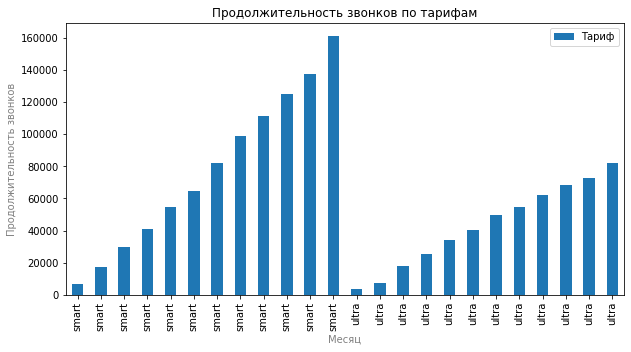

In [47]:

df_month_sum.plot( y = 'calls_duration', kind = 'bar', figsize = (10,5), title = 'Продолжительность звонков по тарифам')
plt.xlabel('Месяц',color='gray')
plt.ylabel('Продолжительность звонков',color='gray')
plt.legend(['Тариф'])

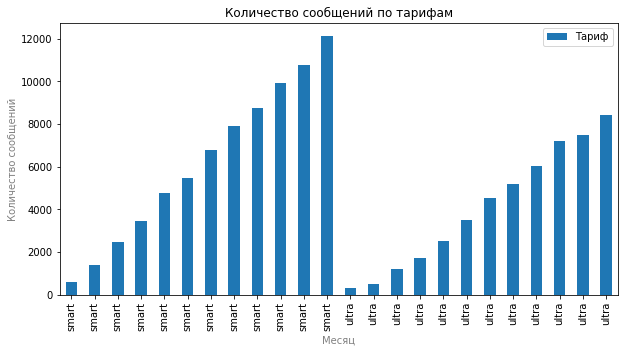

In [48]:

df_month_sum.plot( y = 'messages_count', kind = 'bar', figsize = (10,5), title = 'Количество сообщений по тарифам')
plt.xlabel('Месяц',color='gray')
plt.ylabel('Количество сообщений',color='gray')
plt.legend(['Тариф'])

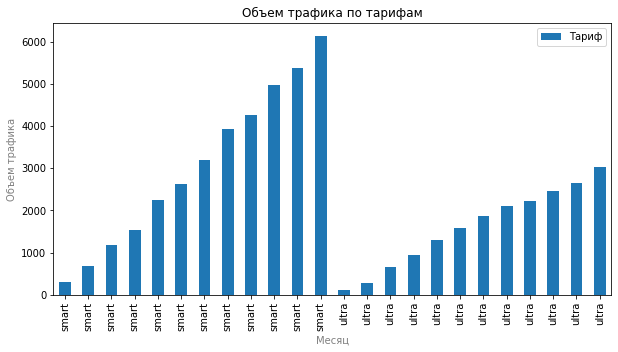

In [49]:

df_month_sum.plot( y = 'traffic_volume', kind = 'bar', figsize = (10,5), title = 'Объем трафика по тарифам')
plt.xlabel('Месяц',color='gray')
plt.ylabel('Объем трафика',color='gray')
plt.legend(['Тариф'])

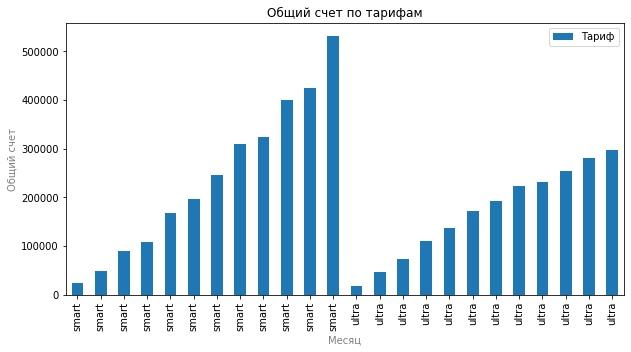

In [50]:
df_month_sum.plot( y = 'total_bill', kind = 'bar', figsize = (10,5), title = 'Общий счет по тарифам')
plt.xlabel('Месяц',color='gray')
plt.ylabel('Общий счет',color='gray')
plt.legend(['Тариф'])

На количественные показатели здесь можно не смотреть, т.к. объем выборок разный:

In [51]:
df_cmiu_pivot[df_cmiu_pivot['tariff']=='smart']['tariff'].count()

2229

In [52]:
df_cmiu_pivot[df_cmiu_pivot['tariff']=='ultra']['tariff'].count()

985

### А вот поведение клиентов в течение рассматриваемого периода времени графики показывают очень хорошо:

##### Как видим все параметры (количество звонков, продолжительность разговоров, количество сообщений, объем израсходованного интернет-трафика и ежемесячный счет) растут о января к декабрю, причем растут довольно таки линейно и не зависимо от того, какой тариф используют клиенты.

##### Январь и декабрь еще могу объяснить - в январе много отдыхают семьями и не до звонков, а в декабре все аврально завершают дела и поздравляют близких. Можно предположить, что постепенный и устойчивый рост объясняется приходом новых пользователей.

#### Посчитаем среднее, дисперсию и стандартное отклонение для всех пользователей в течение всего периода:
Применим цикл, в котором с помощью сводных таблиц раассчитаем необходимые параметры.

calls_duration_mean  messages_count_mean  traffic_volume_mean  \
tariff month                                                                  
smart  1.0             203.852941            18.235294           721.323529   
       2.0             298.689655            24.086207           827.603448   
       3.0             390.051948            31.857143          1164.623377   
       4.0             367.133929            30.741071           963.089286   
       5.0             387.361702            33.773050          1197.510638   
       6.0             395.640244            33.402439          1204.018293   
       7.0             408.353234            33.751244          1223.950249   
       8.0             421.468085            33.638298          1320.595745   
       9.0             428.611538            33.638462          1249.946154   
       10.0            426.136054            33.765306          1364.853741   
       11.0            435.265823            34.075949          1343.047468   
       12.0            478.560831            35.994065          1578.531157   
ultra  1.0             428.111111            33.777778          1950.000000   
       2.0             297.125000            21.958333          1975.000000   
       3.0             489.648649            32.297297          2014.864865   
       4.0             458.018182            31.563636          2001.818182   
       5.0             510.328358            37.850746          2059.701493   
       6.0             479.702381            41.726190          2039.285714   
       7.0             545.791209            49.846154          2118.131868   
       8.0             510.775701            48.439252          2083.177570   
       9.0             539.443478            52.286957          2024.347826   
       10.0            558.081301            58.430894          2065.853659   
       11.0            541.380597            55.791045          2092.164179   
       12.0            592.805755            60.611511          2138.848921   

              total_bill_mean  
tariff month                   
smart  1.0           8.735294  
       2.0          11.844828  
       3.0          15.233766  
       4.0          13.625000  
       5.0          15.907801  
       6.0          15.951220  
       7.0          15.875622  
       8.0          16.736170  
       9.0          16.392308  
       10.0         16.880952  
       11.0         17.000000  
       12.0         18.201780  
ultra  1.0          13.222222  
       2.0          12.000000  
       3.0          17.648649  
       4.0          16.963636  
       5.0          19.373134  
       6.0          18.940476  
       7.0          20.505495  
       8.0          19.598131  
       9.0          19.243478  
       10.0         20.065041  
       11.0         19.805970  
       12.0         21.741007

calls_duration_var  messages_count_var  traffic_volume_var  \
tariff month                                                               
smart  1.0          23787.341355          262.367201        1.925162e+05   
       2.0          36412.287961          473.097701        2.923587e+05   
       3.0          36823.155161          718.492481        4.872390e+05   
       4.0          34778.207127          602.139559        3.159166e+05   
       5.0          34820.061094          730.990983        5.226902e+05   
       6.0          30742.918861          806.806374        5.561252e+05   
       7.0          32250.269602          799.887811        5.453382e+05   
       8.0          34793.583379          838.257501        6.276194e+05   
       9.0          33535.342723          790.617820        5.366885e+05   
       10.0         35392.336375          816.111966        7.102664e+05   
       11.0         31605.237050          805.937071        6.331858e+05   
       12.0         39698.622033          934.952346        1.070678e+06   
ultra  1.0          72769.361111          940.694444        0.000000e+00   
       2.0          87919.679348          716.824275        7.173913e+03   
       3.0         111384.900901         1732.381381        4.317568e+04   
       4.0          71653.870034         1407.287542        3.851515e+04   
       5.0          83870.193578         1624.644052        1.626696e+05   
       6.0          91535.946500         1986.297619        9.982358e+04   
       7.0          94322.278144         2372.042735        1.989176e+05   
       8.0          97956.496385         2171.739199        1.597615e+05   
       9.0         105716.775286         2152.855530        6.093707e+04   
       10.0        106464.583500         2697.181661        1.496851e+05   
       11.0         96570.057064         2476.948491        1.675885e+05   
       12.0        117276.331561         2681.978417        2.326103e+05   

              total_bill_var  
tariff month                  
smart  1.0         39.412656  
       2.0         37.150938  
       3.0         32.549897  
       4.0         31.299550  
       5.0         34.370010  
       6.0         31.911716  
       7.0         33.419453  
       8.0         30.041207  
       9.0         25.884110  
       10.0        32.897042  
       11.0        27.180952  
       12.0        29.786544  
ultra  1.0         44.444444  
       2.0        109.130435  
       3.0        114.345345  
       4.0         89.443098  
       5.0         95.631389  
       6.0         82.394005  
       7.0         96.430525  
       8.0        105.148298  
       9.0         86.255988  
       10.0        91.258030  
       11.0        93.796656  
       12.0       103.236784

calls_duration_std  messages_count_std  traffic_volume_std  \
tariff month                                                               
smart  1.0            154.231454           16.197753          438.766641   
       2.0            190.820041           21.750809          540.702011   
       3.0            191.893604           26.804710          698.025091   
       4.0            186.489161           24.538532          562.064543   
       5.0            186.601343           27.036845          722.973153   
       6.0            175.336587           28.404337          745.738005   
       7.0            179.583601           28.282288          738.470208   
       8.0            186.530382           28.952677          792.224318   
       9.0            183.126576           28.117927          732.590262   
       10.0           188.128510           28.567673          842.773037   
       11.0           177.778618           28.389031          795.729727   
       12.0           199.245131           30.576990         1034.735951   
ultra  1.0            269.757968           30.670742            0.000000   
       2.0            296.512528           26.773574           84.698955   
       3.0            333.743765           41.621886          207.787573   
       4.0            267.682405           37.513831          196.252775   
       5.0            289.603511           40.306874          403.323204   
       6.0            302.549081           44.567899          315.948698   
       7.0            307.119322           48.703621          446.001774   
       8.0            312.980026           46.601923          399.701771   
       9.0            325.141162           46.398874          246.854352   
       10.0           326.289110           51.934398          386.891620   
       11.0           310.757232           49.768951          409.375762   
       12.0           342.456321           51.787821          482.296858   

              total_bill_std  
tariff month                  
smart  1.0          6.277950  
       2.0          6.095157  
       3.0          5.705252  
       4.0          5.594600  
       5.0          5.862594  
       6.0          5.649046  
       7.0          5.780956  
       8.0          5.480986  
       9.0          5.087643  
       10.0         5.735594  
       11.0         5.213535  
       12.0         5.457705  
ultra  1.0          6.666667  
       2.0         10.446551  
       3.0         10.693238  
       4.0          9.457436  
       5.0          9.779130  
       6.0          9.077114  
       7.0          9.819905  
       8.0         10.254184  
       9.0          9.287410  
       10.0         9.552907  
       11.0         9.684867  
       12.0        10.160550

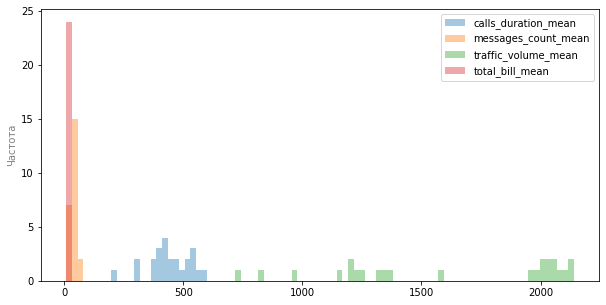

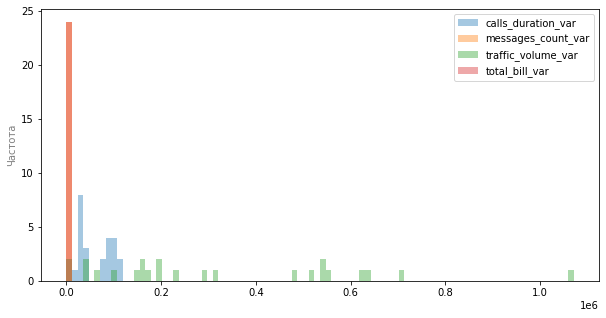

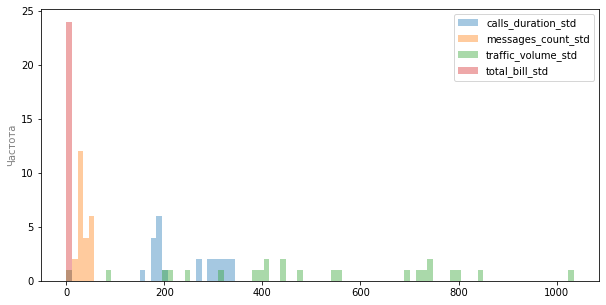

In [53]:
for i in range(0, 3):
    functions = ['mean', np.var, np.std]# функции, которые будем применять к значениям
    tables = ['total_month_sum_mean', 'total_month_sum_var', 'total_month_sum_std']# названия сводных таблиц
    list_of_cols = ['calls_duration', 'messages_count', 'traffic_volume', 'total_bill']# значения
    suffix = ['_mean', '_var', '_std']# суффикс, который добавим к именам колонок
    

    tables[i] = df_cmiu_pivot.pivot_table(index=['tariff', 'month'], values=list_of_cols, aggfunc=functions[i])
    tables[i].columns = ['calls_duration'+suffix[i], 'messages_count'+suffix[i],\
                         'traffic_volume'+suffix[i], 'total_bill'+suffix[i]]
    display(tables[i])
    tables[i].plot( bins=90, kind = 'hist', figsize = (10,5), alpha = 0.4)
    plt.ylabel('Частота',color='gray');
    

##### ––––––––––– Конец ячеек ревьюера ––––––––––– 

### В среднем пользователи тарифа ультра больше пользуются услугами оператора, чем пользователи тарифа смарт.

### Однако рассеяние вокруг среднего значения у ультра также выше, кроме параметра интернет-трафик. Тут можно выделить два момента:

##### большая дисперсия у ультра можно объяснить меньшим объемом выборки, чем у смарт;
##### меньшая дисперсия в интрнет-трафике говорит о том, что возможно пользователи выбирают тариф ультра из-за большого включенного пакета мегабайт трафика, т.к. сейчас в основном большая часть звонков и сообщений передается посредством сети интрнет. Т.о. пользователи ультра не заботятся об экономии трафика и используют его свободно, что приводит к среднему с меньшим разбросом. В то время как пользователи смарт экономно используют свой лимит и в итоге к концу месяца у многих оставшийся трафик сгорает, а у некоторых, кто "забылся" и не следил за лимитом, - перерасход.

## Посмотрим какое количество пользователей тратит то или иное количество предоставленных услуг. Для этого построим частотные гистограммы:

In [54]:
# сгруппируем данных сводной таблицей по тарифу и пользователям:
cmit_sum_for_hist = (df_cmiu_pivot
                     .pivot_table(index=['tariff', 'user_id', 'month'],values=['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_bill'],\
                                  aggfunc=sum))

# расставим столбцы в удобном порядке:
cols = cmit_sum_for_hist.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[-2:4]
cmit_sum_for_hist = cmit_sum_for_hist[cols]

cmit_sum_for_hist.reset_index(inplace=True)

cmit_sum_for_hist

,tariff,user_id,month,calls_count,calls_duration,messages_count,traffic_volume,total_bill
0,smart,1001,11.0,59.0,430.0,0.0,18.0,1150.0
1,smart,1001,12.0,63.0,414.0,0.0,14.0,550.0
2,smart,1002,6.0,15.0,117.0,4.0,11.0,550.0
3,smart,1002,7.0,26.0,214.0,11.0,18.0,1150.0
4,smart,1002,8.0,42.0,289.0,13.0,20.0,1550.0
...,...,...,...,...,...,...,...,...
3209,ultra,1495,8.0,17.0,92.0,13.0,3.0,1950.0
3210,ultra,1495,9.0,112.0,813.0,82.0,33.0,2400.0
3211,ultra,1495,10.0,152.0,1030.0,82.0,29.0,1950.0
3212,ultra,1495,11.0,129.0,954.0,79.0,39.0,3300.0


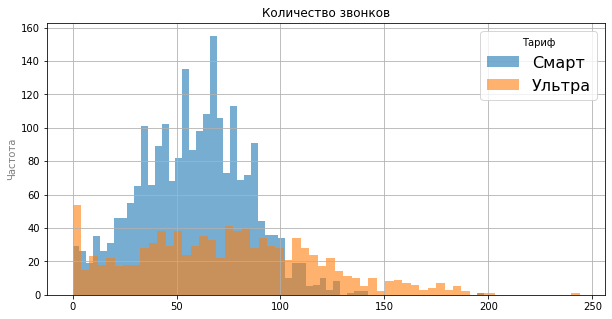

In [55]:
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='smart']['calls_count'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Количество звонков', label = 'Смарт', alpha = 0.6)
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='ultra']['calls_count'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Количество звонков', label = 'Ультра', grid=True, legend=True, alpha = 0.6)
plt.ylabel('Частота',color='gray')
plt.legend(prop={'size': 16}, title = 'Тариф');


In [66]:
for i in range(0, 3):
    functions = ['mean', np.var, np.std]# функции, которые будем применять к значениям
    tables = ['total_month_sum_mean', 'total_month_sum_var', 'total_month_sum_std']# названия сводных таблиц
    list_of_cols = ['calls_duration', 'messages_count', 'traffic_volume', 'total_bill']# значения
    suffix = ['_mean', '_var', '_std']# суффикс, который добавим к именам колонок
    

    tables[i] = df_cmiu_pivot.pivot_table(index=['tariff'], values=list_of_cols, aggfunc=functions[i])
    tables[i].columns = ['calls_duration'+suffix[i], 'messages_count'+suffix[i],\
                         'traffic_volume'+suffix[i], 'total_bill'+suffix[i]]
    display(tables[i])

    

,calls_duration_mean,messages_count_mean,traffic_volume_mean,total_bill_mean
tariff,,,,
smart,417.934948,33.384029,1289.973531,16.328847
ultra,526.623350,49.363452,2070.152284,19.494416


,calls_duration_var,messages_count_var,traffic_volume_var,total_bill_var
tariff,,,,
smart,36219.315784,796.812958,669785.708006,33.028705
ultra,100873.633397,2285.266143,141516.745079,97.091686


,calls_duration_std,messages_count_std,traffic_volume_std,total_bill_std
tariff,,,,
smart,190.313730,28.227876,818.404367,5.747061
ultra,317.606098,47.804457,376.187114,9.853511


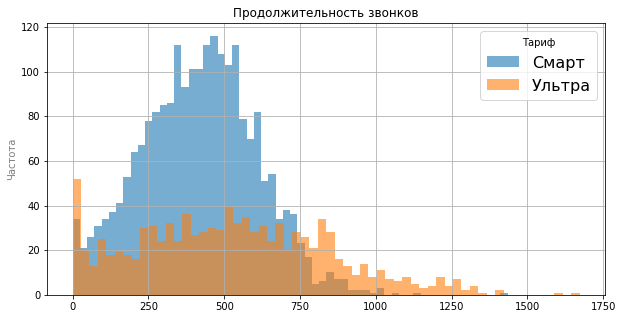

In [57]:
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='smart']['calls_duration'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Продолжительность звонков', label = 'Смарт',alpha = 0.6)
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='ultra']['calls_duration'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Продолжительность звонков', label = 'Ультра', grid=True, legend=True,alpha = 0.6)
plt.ylabel('Частота',color='gray')
plt.legend(prop={'size': 16}, title = 'Тариф');

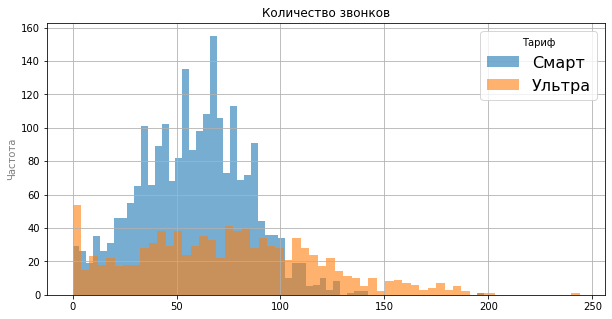

In [56]:
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='smart']['calls_count'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Количество звонков', label = 'Смарт', alpha = 0.6)
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='ultra']['calls_count'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Количество звонков', label = 'Ультра', grid=True, legend=True, alpha = 0.6)
plt.ylabel('Частота',color='gray')
plt.legend(prop={'size': 16}, title = 'Тариф');


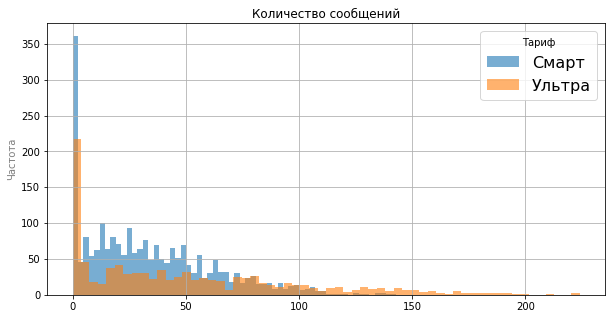

In [58]:
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='smart']['messages_count'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Количество сообщений', label = 'Смарт', alpha = 0.6)
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='ultra']['messages_count'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Количество сообщений', label = 'Ультра', grid=True, legend=True,alpha = 0.6)
plt.ylabel('Частота',color='gray')
plt.legend(prop={'size': 16}, title = 'Тариф');

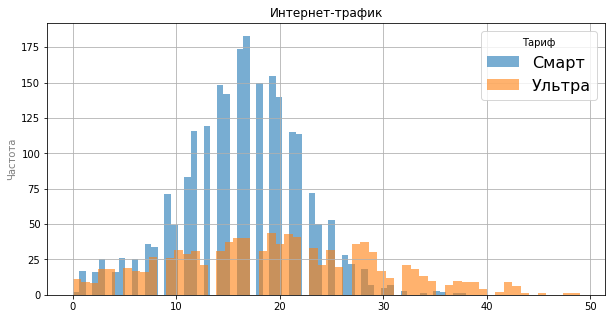

In [59]:
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='smart']['traffic_volume'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Интернет-трафик', label = 'Смарт', alpha = 0.6)
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='ultra']['traffic_volume'].plot(bins=60, kind = 'hist', figsize = (10,5), title = 'Интернет-трафик', label = 'Ультра', grid=True, legend=True, alpha = 0.6)
plt.ylabel('Частота',color='gray')
plt.legend(prop={'size': 16}, title = 'Тариф');

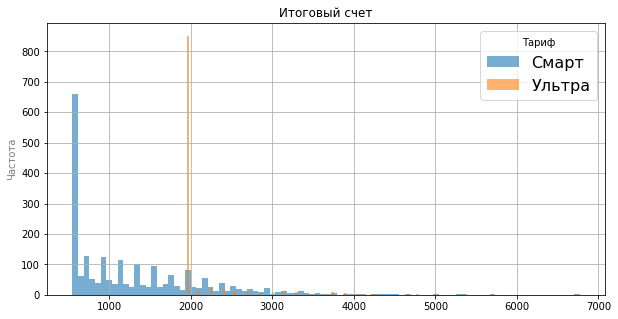

In [60]:
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='smart']['total_bill'].plot(bins=90, kind = 'hist', figsize = (10,5), title = 'Итоговый счет', label = 'Смарт', alpha = 0.6)
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='ultra']['total_bill'].plot(bins=90, kind = 'hist', figsize = (10,5), title = 'Итоговый счет', label = 'Ультра', grid=True, legend=True, alpha = 0.6)
plt.ylabel('Частота',color='gray')
plt.legend(prop={'size': 16}, title = 'Тариф');

<AxesSubplot:title={'center':'Итоговый счет'}, ylabel='Frequency'>

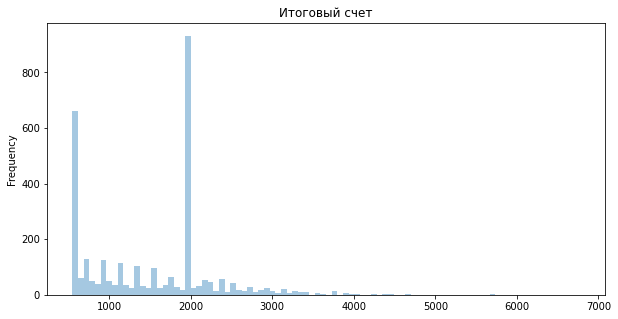

In [61]:
cmit_sum_for_hist['total_bill'].plot(bins=90, kind = 'hist', figsize = (10,5), title = 'Итоговый счет', label = 'Смарт', alpha = 0.4)


<font color='darkorange'>Видим, что у нас 2 всплеска: чуть выше 500 и около 2000. Теперь попробуем вывести гистограмму отдельно для тарифа Ультра <font>

<AxesSubplot:title={'center':'Итоговый счет'}, ylabel='Frequency'>

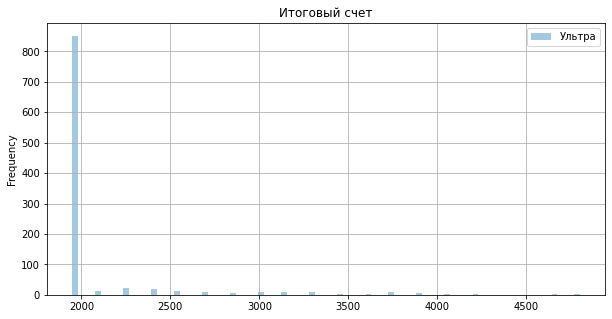

In [62]:
cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='ultra']['total_bill'].plot(bins=90, kind = 'hist', figsize = (10,5), title = 'Итоговый счет', label = 'Ультра', grid=True, legend=True, alpha = 0.4)


<font color='darkorange'>Получается что-то странное. Если честно, я сама не до конца понимаю, почему все значения на оси Х резко стали равны 0 (при том, что в таблице по всем строкам у тарифа Ультра значение 1950.0), но что-то мне подсказывает, что это изменится, когда поправишь функцию, чтобы ГБ сравнивались с ГБ, а не с МБ (тк тогда у тарифа Ультра будет больше одного значения)<font>

##### –––––––––––– Конец ячеек ревьюера ––––––––––––



###### Количество звонков: Пик у смарт приходится на 70, у ультра приближен к 0.

###### Продолжительность звонков: У смарт наблюдается два основных пика около 300,400 и 600 минут, у ультра один - около 0. В основном люди тарифа смарт говорят не больше 750 минут в год, в то время как клиенты ультра почти 1750 минут. Также видим, что у ультра есть небольшой пик около 500. Более того, в пакет тарифа смарт входит 500 минут разговора. Можно отметить продолжительность звонков сверх лимита (от 500 до 1000 минут). Что касается тарифа ультра, то все клиенты укладываются в лимит по минутам (3000 минут).


###### Количество сообщений: В обоих тарифах высока доля людей крайне мало использующих смс. При этом следует помнить, что ранее мы заменили 500 пропусков в датафрейме нулями и сейчас наблюдаем результаты этого действия. Но в любом случае все сейчас пользуются месенджерами. Но в то же время, количество околонулевых значений у смарт выше, чем у ультра.Более того, в пакет тарифа смарт входит 50 сообщений. Можно отметить количество сообщений сверх лимита (от 50 до 100 сообщений). Что касается тарифа ультра, то все клиенты укладываются в лимит по сообщениям (1000 сообщений).

###### Интернет-трафик: У обоих тарифов наблюдается пик значений в районе 20-60 мб. Тем не менее пик у ультра в районе 35 мб, у смарт все пики приходятся на 30-50 мб. Более того, в пакет тарифа смарт входит 15 Гб интернет-трафика. Можно отметить использование интернет-трафика сверх лимита. Такой же вывод можно сделать и про тариф ультра,  клиенты не укладываются в лимит по трафику (более 30 Гб).

###### Итоговый счет: Анализируя полученные данные, можно отметить, что тариф ультра более стабилен по выплатам по трафикам. Основной пик приходится на 1950 рублей, что является платой за пакет использования трафика в месяц. Большинство клиентов укладываются в пакет по трафику, используют в пределах пакета продолжительность звонков, количество сообщений, количество звонков. Для тарифа смарт характерено чрезмерное использование тарифа, по всем пунктам клиенты не укладываются в пределы пакета. Пик приходится на 550 рублей, но можно увидеть множество счетов, которые привышают ежемесячную плату за тариф. Так, тариф ультра является более стабильным и выгодным для клиентов.

### Проверка гипотез
##### Первая гипотеза

Первая гипотеза которую нужно проверить - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Сформулируем нулевую и альтернативную гипотезы:

H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны (в H0 всегда используется знак равенства);
H1 - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.
Чтобы проверить гипотезу о равенстве среднего применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где equal_var - параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать). Т.к. мы знаем, что дисперсии выборок по смарт и ультра различаются (3.436001e+07 и 9.886460e+07 соответственно), то equal_var зададим как False.

In [63]:
smart_ttest = df_cmiu_pivot[df_cmiu_pivot['tariff']=='smart']['total_bill']
ultra_ttest = df_cmiu_pivot[df_cmiu_pivot['tariff']=='ultra']['total_bill']

# уровень значимости зададим равным 5%
alpha = 0.05

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


#### p-уровень значимости слишком мал, гораздо меньше определенного нами порогового значения в 5% => средняя выручка пользователей тарифов смарт и ульра значимо отличаются друг от друга.

### Вторая гипотеза

Вторая гипотеза для проверки звучит так - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;
Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Альтернативная гипотеза у нас двусторонняя, т.к. средняя выручка из Москвы может отличаться от других регионов как в большую так и в меньшую сторону.

Для проверки гипотезы воспользуемся методом scipy.stats.ttest_1samp (array, popmean), где в качестве массива данных будет выборка выручки по москвичам, а в качестве popmean (предполагаемого среднего, на равенство которому мы делаем тест) будет выступать среднее значение выручки пользователей из других регионов.

In [64]:
moscow_ttest = df_cmiu_pivot[df_cmiu_pivot['city']=='Москва']['total_bill']

popmean = df_cmiu_pivot[df_cmiu_pivot['city']!='Москва']['total_bill'].mean()

# уровень значимости 5%
alpha = 0.05

results = st.ttest_1samp(moscow_ttest, popmean)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4744239730695693
Не получилось отвергнуть нулевую гипотезу


#### р-уровень значимости составил почти 39%, что значительно выше 5% => средняя выручка по Москве статистически значимо не отличается от средней выручки по другим регионам.

# Общий вывод 


Сравнивая дисперсии двух тарифов, можно отметить превышение дисперсии тарифа ультра над тарифом смарт по следующим пунктам: продолжительность звонков, количество сообщений. По выручке дисперсия тарифа ультра также превышает значения смарт. Таким образом, можно сделать вывод, что у тарифа ультра большой разброс данных. Он больше чем у тарифа смарт. Такую дисперсию можно объяснить большим объемом трафика, количества сообщений и звонков, продолжительности звонков. 

Что касается стандартного отклонения тарифа ультра, то оно также больше стандартного отклонения тарифа смарт по таким пунктам как:продолжительность звонков, количество сообщений. Выручка тарифа ультра также превышает выручку стандартного отклонения тарифа смарт. Многие клиенты пользуются возможностями тарифа ультра, не обращая внимания на количество сообщений, продолжительность звонков. В то время как клиенты тарифа смарт стараются укладываться в пределы пакета тарифа, что характеризуется меньшим стандартным отклонением. 



#### В силу большей дисперсии ультра имеет более длинные хвосты чем смарт.

##### Количество звонков: Пик у смарт приходится на 70, у ультра приближен к 0.

##### Продолжительность звонков: У смарт наблюдается два основных пика около 300,400 и 600 минут, у ультра один - около 0. В основном люди тарифа смарт говорят не больше 750 минут в год, в то время как клиенты ультра почти 1750 минут. Также видим, что у ультра есть небольшой пик около 500. Более того, в пакет тарифа смарт входит 500 минут разговора. Можно отметить продолжительность звонков сверх лимита (от 500 до 1000 минут). Что касается тарифа ультра, то все клиенты укладываются в лимит по минутам (3000 минут).

##### Количество сообщений: В обоих тарифах высока доля людей крайне мало использующих смс. При этом следует помнить, что ранее мы заменили 500 пропусков в датафрейме нулями и сейчас наблюдаем результаты этого действия. Но в любом случае все сейчас пользуются месенджерами. Но в то же время, количество околонулевых значений у смарт выше, чем у ультра.Более того, в пакет тарифа смарт входит 50 сообщений. Можно отметить количество сообщений сверх лимита (от 50 до 100 сообщений). Что касается тарифа ультра, то все клиенты укладываются в лимит по сообщениям (1000 сообщений).

##### Интернет-трафик: У обоих тарифов наблюдается пик значений в районе 20-60 мб. Тем не менее пик у ультра в районе 35 мб, у смарт все пики приходятся на 30-50 мб. Более того, в пакет тарифа смарт входит 15 Гб интернет-трафика. Можно отметить использование интернет-трафика сверх лимита. Такой же вывод можно сделать и про тариф ультра, клиенты не укладываются в лимит по трафику (более 30 Гб).

##### Итоговый счет: Анализируя полученные данные, можно отметить, что тариф ультра более стабилен по выплатам по трафикам. Основной пик приходится на 1950 рублей, что является платой за пакет использования трафика в месяц. Большинство клиентов укладываются в пакет по трафику, используют в пределах пакета продолжительность звонков, количество сообщений, количество звонков. Для тарифа смарт характерено чрезмерное использование тарифа, по всем пунктам клиенты не укладываются в пределы пакета. Пик приходится на 550 рублей, но можно увидеть множество счетов, которые привышают ежемесячную плату за тариф. Так, тариф ультра является более стабильным и выгодным для клиентов.

### Первая гипотеза которую нужно было проверить - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
### p-уровень значимости слишком мал, гораздо меньше определенного нами порогового значения в 5% => средняя выручка пользователей тарифов смарт и ульра значимо отличаются друг от друга.

### Вторая гипотеза для проверки звучит так - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
### р-уровень значимости составил почти 39%, что значительно выше 5% => средняя выручка по Москве статистически значимо не отличается от средней выручки по другим регионам.

### Сделав предварительный анализ тарифов на небольшой выборке пользователей можем передать следующие результаты коммерческому отделу:

### Средние чеки тарифов смарт и ультра значимо различаются. В среднем пользователи тарифа ультра платят больше;
### Т.к. средняя выручка по москве и другим регионам значимо не различаются, то рекламную компанию можно устроить по всей территории распространения сети;
### Поведение клиентов в течение года очень хорошо отображено на графиках. Эти графики будут полезны чтобы скорректировать во времени рекламные компании.
### В соответствии с проведенным анализом на тариф ультра стоит направить рекламный бюджет. 